In [58]:
import pandas as pd
import json
import seaborn as sns

sns.set_style('darkgrid')
# Tamaño figuras
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

In [5]:
df = pd.read_json('prueba.json', lines=True)
df

,type,data,metric
0,Metric,"{'name': 'http_reqs', 'type': 'counter', 'cont...",http_reqs
1,Point,{'time': '2022-06-04T20:53:31.645130908+02:00'...,http_reqs
2,Metric,"{'name': 'http_req_duration', 'type': 'trend',...",http_req_duration
3,Point,{'time': '2022-06-04T20:53:31.645130908+02:00'...,http_req_duration
4,Metric,"{'name': 'http_req_blocked', 'type': 'trend', ...",http_req_blocked
...,...,...,...
1483616,Point,{'time': '2022-06-04T21:04:31.538228394+02:00'...,iterations
1483617,Point,{'time': '2022-06-04T21:04:31.613928543+02:00'...,data_sent
1483618,Point,{'time': '2022-06-04T21:04:31.613928543+02:00'...,data_received
1483619,Point,{'time': '2022-06-04T21:04:31.613928543+02:00'...,iteration_duration


In [6]:
#PASAMOS A LISTA QUE SINO NO NORMALIZA
data = [json.loads(line) for line in open('prueba.json','r')]

In [7]:
#NORMALIZAMOS
df1 = pd.json_normalize(data)
df1

,type,metric,data.name,data.type,data.contains,data.tainted,data.thresholds,data.submetrics,data.time,data.value,...,data.tags.proto,data.tags.scenario,data.tags.url,data.tags.status,data.tags.tls_version,data.tags.expected_response,data.tags.group,data.tags.method,data.tags,data.tags.error_code
0,Metric,http_reqs,http_reqs,counter,default,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point,http_reqs,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-04T20:53:31.645130908+02:00,1.000000,...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN,NaN
2,Metric,http_req_duration,http_req_duration,trend,time,NaN,[],[{'name': 'http_req_duration{expected_response...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point,http_req_duration,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-04T20:53:31.645130908+02:00,174.106196,...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN,NaN
4,Metric,http_req_blocked,http_req_blocked,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483616,Point,iterations,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-04T21:04:31.538228394+02:00,1.000000,...,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
1483617,Point,data_sent,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-04T21:04:31.613928543+02:00,43.000000,...,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
1483618,Point,data_received,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-04T21:04:31.613928543+02:00,168.000000,...,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
1483619,Point,iteration_duration,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-04T21:04:31.613928543+02:00,1149.144980,...,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN,NaN


In [8]:
df2 = df1[df1.type=='Point']
df1 = df1[df1.type=='Metric']
df1

,type,metric,data.name,data.type,data.contains,data.tainted,data.thresholds,data.submetrics,data.time,data.value,...,data.tags.proto,data.tags.scenario,data.tags.url,data.tags.status,data.tags.tls_version,data.tags.expected_response,data.tags.group,data.tags.method,data.tags,data.tags.error_code
0,Metric,http_reqs,http_reqs,counter,default,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Metric,http_req_duration,http_req_duration,trend,time,NaN,[],[{'name': 'http_req_duration{expected_response...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Metric,http_req_blocked,http_req_blocked,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Metric,http_req_connecting,http_req_connecting,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Metric,http_req_tls_handshaking,http_req_tls_handshaking,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Metric,http_req_sending,http_req_sending,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Metric,http_req_waiting,http_req_waiting,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Metric,http_req_receiving,http_req_receiving,trend,time,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Metric,http_req_failed,http_req_failed,rate,default,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Metric,vus,vus,gauge,default,NaN,[],None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns_df1 = ["type","metric","data.name","data.type","data.contains","data.tainted","data.thresholds","data.submetrics"]
columns_df2 = ["type","metric","data.time","data.value","data.tags.name","data.tags.proto","data.tags.scenario","data.tags.url","data.tags.status","data.tags.tls_version","data.tags.expected_response","data.tags.group","data.tags.method","data.tags.error_code"]
df1 = df1.loc[:, columns_df1]
df2 = df2.loc[:, columns_df2]
df1

,type,metric,data.name,data.type,data.contains,data.tainted,data.thresholds,data.submetrics
0,Metric,http_reqs,http_reqs,counter,default,NaN,[],None
2,Metric,http_req_duration,http_req_duration,trend,time,NaN,[],[{'name': 'http_req_duration{expected_response...
4,Metric,http_req_blocked,http_req_blocked,trend,time,NaN,[],None
6,Metric,http_req_connecting,http_req_connecting,trend,time,NaN,[],None
8,Metric,http_req_tls_handshaking,http_req_tls_handshaking,trend,time,NaN,[],None
10,Metric,http_req_sending,http_req_sending,trend,time,NaN,[],None
12,Metric,http_req_waiting,http_req_waiting,trend,time,NaN,[],None
14,Metric,http_req_receiving,http_req_receiving,trend,time,NaN,[],None
16,Metric,http_req_failed,http_req_failed,rate,default,NaN,[],None
18,Metric,vus,vus,gauge,default,NaN,[],None


In [11]:
new_columns_df1 = ["type","metric","dataname","datatype","datacontains","datatainted","datathresholds","datasubmetrics"]
new_columns_df2 = ["type","metric","datatime","datavalue","datatagsname","datatagsproto","datatagsscenario","datatagsurl","datatagsstatus","datatagstls_version","datatagsexpected_response","datatags.group","datatagsmethod","datatagserror_code"]
df1.columns = new_columns_df1
df2.columns = new_columns_df2

,type,metric,datatime,datavalue,datatagsname,datatagsproto,datatagsscenario,datatagsurl,datatagsstatus,datatagstls_version,datatagsexpected_response,datatags.group,datatagsmethod,datatagserror_code
1,Point,http_reqs,2022-06-04T20:53:31.645130908+02:00,1.000000,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN
3,Point,http_req_duration,2022-06-04T20:53:31.645130908+02:00,174.106196,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN
5,Point,http_req_blocked,2022-06-04T20:53:31.645130908+02:00,389.088508,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN
7,Point,http_req_connecting,2022-06-04T20:53:31.645130908+02:00,94.531201,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN
9,Point,http_req_tls_handshaking,2022-06-04T20:53:31.645130908+02:00,225.783391,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,200,tls1.2,true,,GET,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483616,Point,iterations,2022-06-04T21:04:31.538228394+02:00,1.000000,NaN,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN
1483617,Point,data_sent,2022-06-04T21:04:31.613928543+02:00,43.000000,NaN,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN
1483618,Point,data_received,2022-06-04T21:04:31.613928543+02:00,168.000000,NaN,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN
1483619,Point,iteration_duration,2022-06-04T21:04:31.613928543+02:00,1149.144980,NaN,NaN,default,NaN,NaN,NaN,NaN,,NaN,NaN


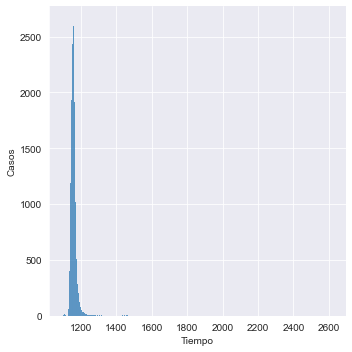

In [62]:

fig = sns.displot(data=df2[df2.metric=='iteration_duration'], x='datavalue', fill=True)
fig.set_axis_labels('Tiempo', 'Casos')

In [81]:
df2[(df2.metric=='http_reqs') & (df2.datatagserror_code.notna())]

,type,metric,datatime,datavalue,datatagsname,datatagsproto,datatagsscenario,datatagsurl,datatagsstatus,datatagstls_version,datatagsexpected_response,datatags.group,datatagsmethod,datatagserror_code
95540,Point,http_reqs,2022-06-04T20:55:12.462717496+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
99523,Point,http_reqs,2022-06-04T20:55:14.56780044+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
143462,Point,http_reqs,2022-06-04T20:55:35.369760858+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
152948,Point,http_reqs,2022-06-04T20:55:39.578237384+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
195474,Point,http_reqs,2022-06-04T20:55:58.603295305+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342978,Point,http_reqs,2022-06-04T21:03:05.07411064+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
1346757,Point,http_reqs,2022-06-04T21:03:06.253833014+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
1372202,Point,http_reqs,2022-06-04T21:03:14.616193029+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
1386644,Point,http_reqs,2022-06-04T21:03:19.814835244+02:00,1.0,https://61qcyq7vsh.execute-api.us-east-1.amazo...,HTTP/2.0,default,https://61qcyq7vsh.execute-api.us-east-1.amazo...,503,tls1.2,false,,GET,1503
